## Tabla de Contenidos

1. <a href='#section_Importacion_de_modules'>Importación de modules</a>
2. <a href='#section_Importacion_de_dataset'>Importación del dataset patient_covid.csv</a>
3. <a href='#section_Modelos'>Modelos</a> 
</br>3.1 <a href='#section_KNN'>KNN</a>
</br>3.2 <a href='#section_rl'>Regresión logística</a>
</br>3.3 <a href='#section_nbm'>Naive Bayes multinomial</a>
4. <a href='#section_1'>otro1</a> 

------------
</br>3.1.1. <a href='#section_preparacion'>Preparar la matriz de _features_ y el vector _target_</a>
</br>3.1.1. <a href='#section_optimizando'>Optimizando el valor de _k_</a>
</br>3.1.2. <a href="#section_confusion">Matriz de confusión</a>
</br>3.1.3. <a href="#section_conclusion">Conclusión</a>


# **1. Importación de *modules***
<a id="section_Importacion_de_modules"></a>

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn import metrics
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score, KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score ,f1_score ,classification_report , confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import normalize, StandardScaler

from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings("ignore")

import funciones as f

# **2. Importación del dataset patient_covid.csv**
<a id="section_Importacion_de_dataset"></a>

In [2]:
data_covid = pd.read_csv("../data/patient_covid.csv", sep = ",", low_memory=False) 
f._get_info(data_covid)

#data_covid_knn = pd.read_csv("../data/patient_covid_knn.csv", sep = ",", low_memory=False) 
data_covid_knn = pd.read_csv("../data/patient_covid.csv", sep = ",", low_memory=False) 
f._get_info(data_covid_knn)

   inpatient  agegroup_10-19  agegroup_20-29  agegroup_30-39  agegroup_40-49  \
0          0               0               0               0               1   
1          0               0               0               0               0   
2          1               0               0               0               0   

   agegroup_50-59  agegroup_60-69  agegroup_70-79  agegroup_80-89  \
0               0               0               0               0   
1               1               0               0               0   
2               1               0               0               0   

   agegroup_90-99  ...  diabetes_Y  hypertension_Y  immunosuppression_Y  \
0               0  ...           0               0                    0   
1               0  ...           0               0                    0   
2               0  ...           1               1                    0   

   obesity_Y  other_diseases_N  other_diseases_Y  pneumonia_Y  pregnant_Y  \
0          0            

# **3.Modelos**
<a id="section_Modelos"></a>

## **3.1. KNN** <a id="section_KNN"></a>

#### ***Preparar la matriz de _features_ y el vector _target_***
<a id="section_preparacion"></a>


In [3]:
data_covid_knn['inpatient'].value_counts(normalize=True)

0    0.734629
1    0.265371
Name: inpatient, dtype: float64

In [4]:
#cols_features=data_covid_knn.columns.difference(['inpatient','agegroup'])
cols_features=data_covid_knn.columns.difference(['inpatient'])
X = data_covid_knn[cols_features]
y = data_covid_knn['inpatient']
X.head(3) 
X.columns

agegroup_10-19  agegroup_20-29  agegroup_30-39  agegroup_40-49  \
0               0               0               0               1   
1               0               0               0               0   
2               0               0               0               0   

   agegroup_50-59  agegroup_60-69  agegroup_70-79  agegroup_80-89  \
0               0               0               0               0   
1               1               0               0               0   
2               1               0               0               0   

   agegroup_90-99  asthma_Y  ...  diabetes_Y  hypertension_Y  \
0               0         1  ...           0               0   
1               0         0  ...           0               0   
2               0         0  ...           1               1   

   immunosuppression_Y  obesity_Y  other_diseases_N  other_diseases_Y  \
0                    0          0                 1                 0   
1                    0          0                 1                 0   
2                    0          1                 1                 0   

   pneumonia_Y  pregnant_Y  sex_M  smoker_Y  
0            0           0      1         0  
1            0           0      0         0  
2            0           0      1         0  

[3 rows x 27 columns]

Index(['agegroup_10-19', 'agegroup_20-29', 'agegroup_30-39', 'agegroup_40-49',
       'agegroup_50-59', 'agegroup_60-69', 'agegroup_70-79', 'agegroup_80-89',
       'agegroup_90-99', 'asthma_Y', 'cardiovascular_Y',
       'chronic_kidney_failure_N', 'chronic_kidney_failure_Y', 'copd_Y',
       'covid_NOA', 'covid_Y', 'diabetes_N', 'diabetes_Y', 'hypertension_Y',
       'immunosuppression_Y', 'obesity_Y', 'other_diseases_N',
       'other_diseases_Y', 'pneumonia_Y', 'pregnant_Y', 'sex_M', 'smoker_Y'],
      dtype='object')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,stratify=data_covid['inpatient'],random_state=123)
display(y_train.value_counts(normalize=True).round(2))
display(y_test.value_counts(normalize=True).round(2))

0    0.73
1    0.27
Name: inpatient, dtype: float64

0    0.73
1    0.27
Name: inpatient, dtype: float64

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

#### ***Modelo Base***

In [7]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred).round(2)

KNeighborsClassifier()

0.86

#### ***Optimizando el valor de k***

<font color='red'>cambio temporario de range(10, 31) a range(10, 21)</font>

In [ ]:
# Definimos la estrategia de validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=12)
scores_para_df_standard = []

#for i in range(10, 31):
for i in range(18, 21):
    model = KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
    dict_row_score = {'score_medio':np.mean(cv_scores),
                      'score_std':np.std(cv_scores), 'n_neighbors':i}
    scores_para_df_standard.append(dict_row_score)

KeyboardInterrupt: 

In [ ]:
# Creamos el DataFrame a partir de la lista de diccionarios
df_scores_standard = pd.DataFrame(scores_para_df_standard)
df_scores_standard.head()

Graficando la búsqueda del mejor hiperparámetro

In [ ]:
# Generamos los límites inferior y superior
df_scores_standard['limite_superior'] = df_scores_standard['score_medio'] + df_scores_standard['score_std']
df_scores_standard['limite_inferior'] = df_scores_standard['score_medio'] - df_scores_standard['score_std']
df_scores_standard.head()

In [ ]:
# Graficamos los resultados
plt.plot(df_scores_standard['n_neighbors'], df_scores_standard['limite_inferior'], color='r')
plt.plot(df_scores_standard['n_neighbors'], df_scores_standard['score_medio'], color='b')
plt.plot(df_scores_standard['n_neighbors'], df_scores_standard['limite_superior'], color='r');

In [ ]:
# Identificamos el score máximo
df_scores_standard.loc[df_scores_standard.score_medio == df_scores_standard.score_medio.max()]

In [ ]:
# Asignamos el valor del k óptimo a una variable
best_k = df_scores_standard.loc[df_scores_standard.score_medio == df_scores_standard.score_medio.max(), 'n_neighbors'].values[0]
print("best k",best_k)

# Elegimos el modelo óptimo de acuerdo a las pruebas de cross validation
model = KNeighborsClassifier(n_neighbors=best_k)

# Lo ajustamos sobre los datos de entrenamiento
model.fit(X_train, y_train)

# Evaluamos qué accuracy obtenemos en train
print("accuracy_score en train",accuracy_score(y_train, model.predict(X_train)).round(4))

In [ ]:
# Lo utilizamos para predecir en test
X_test = scaler.transform(X_test) # ¡Importantísimo estandarizar también los datos de test con las medias y desvíos aprendidos en train!
y_pred = model.predict(X_test)

# Evaluamos el accuracy del modelo en test
print("accuracy_score en test",accuracy_score(y_test, y_pred).round(2))



<a id="section_confusion"></a>
## Matriz de confusión

In [ ]:
    plt.rcParams['figure.figsize'] = (10, 5)
    plt.rcParams['font.size'] = 10

In [ ]:
# Obtenemos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
cm_print_matriz_confusion(y_test, y_pred)

#### **Graficar la matriz de confusión**

<img src="http://acnalert.eastus.cloudapp.azure.com/2/ds/Confusion.jpg" alt="Matriz confusion">

In [ ]:
#  calcular  la exactitud de nuestro modelo...
print("Acuracy score KNN :\n", accuracy_score(y_test, y_pred).round(2))
print("Classification report KNN:\n", classification_report(y_test,y_pred))

In [ ]:
probs=lr.predict_proba(x_test)
preds=probs[:,1]
fpr,tpr, threshold_lr =metrics.roc_curve(y_test, y_pred)
roc_auc_lr=metrics.auc(fpr_lr,tpr_lr)

#graph
plt.title("ROC")

plt.plot(fpr, tpr, 'b', label="KNN" % roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<a id="section_conclusion"></a>
## Conclusión

## **3.2. Regresión logística** <a id="section_rl"></a>

In [ ]:
x=data_covid.drop(["inpatient"],axis=1)
y=data_covid["inpatient"]
y=pd.DataFrame(y)
y

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y, random_state=123)
print ("X_train:" , x_train.shape[0])
print ("y_train:" , y_train.shape[0])
print ("X_test:" , x_test.shape[0])
print ("y_test:" , y_test.shape[0])

In [ ]:
y_train=pd.DataFrame(y_train)
y_train

In [ ]:
#Logistic regression
#scaler = StandardScaler()
#x_trainstd = scaler.fit_transform(x_train)
#x_teststd = scaler.transform(x_test)
lr = LogisticRegression(class_weight="balance")
lr.fit(x_train, y_train)
score_lr= lr.score(x_test, y_test)

In [ ]:
print ("Logistic Regression Score:", score_lr)

In [ ]:
y_pred_lr = lr.predict(x_test)

In [ ]:
print("AS LR:\n", accuracy_score(y_test, y_pred_lr))

In [ ]:
print("CM LR:\n", confusion_matrix(y_test, y_pred_lr))

In [ ]:
lr.intercept_

In [ ]:
lr.coef_

In [ ]:
print("LR:\n", classification_report(y_test,y_pred_lr))

In [ ]:
importance = lr.coef_.flatten()

In [ ]:
plt.rcParams["figure.figsize"] =(10,10)
plt.barh(x.columns,importance,color="g")
plt.title("Barplot Summary of Feature Importance")
plt.xlabel("score")
plt.show()

In [ ]:
#LR
probs_lr=lr.predict_proba(x_test)
preds_lr=probs_lr[:,1]
fpr_lr,tpr_lr, threshold_lr =metrics.roc_curve(y_test, y_pred_lr)
roc_auc_lr=metrics.auc(fpr_lr,tpr_lr)

In [ ]:
plt.title("ROC")

plt.plot(fpr_lr, tpr_lr, 'b', label="LR" % roc_auc_lr)

plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##  **3.3. Naive Bayes multinomial**  <a id="section_nbm"></a>

In [ ]:
x=data_covid.drop(["inpatient"],axis=1)
y=data_covid["inpatient"]
y=pd.DataFrame(y)
y

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y, random_state=123)
print ("X_train:" , x_train.shape[0])
print ("y_train:" , y_train.shape[0])
print ("X_test:" , x_test.shape[0])
print ("y_test:" , y_test.shape[0])

In [ ]:
y_train=pd.DataFrame(y_train)
y_train

In [ ]:
#Naive Bayes
nb=MultinomialNB()
nb.fit(x_train, y_train)
score_nb=nb.score(x_test,y_test)

#  **4. Tree Classification <a id="section_1"></a>**

In [ ]:
x=data_covid.drop(["inpatient"],axis=1)
y=data_covid["inpatient"]
y=pd.DataFrame(y)
y

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y, random_state=123)
print ("X_train:" , x_train.shape[0])
print ("y_train:" , y_train.shape[0])
print ("X_test:" , x_test.shape[0])
print ("y_test:" , y_test.shape[0])

In [ ]:
y_train=pd.DataFrame(y_train)
y_train

In [ ]:
#Tree Classification
clftree = tree.DecisionTreeClassifier(random_state=40)
clftree.fit(x_train, y_train)
score_t = clftree.score(x_test, y_test)

#  **5. Machine Learning Algorithms Target Patient Type <a id="section_1"></a>**

## Modelos con parámetros por defecto

In [22]:
#Naive Bayes
nb=MultinomialNB()
nb.fit(x_train, y_train)
score_nb=nb.score(x_test,y_test)

#KNN (poner en n_neighbors el best_params_ de GridSearch)
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
score_knn=knn.score(x_test,y_test)

#Logistic regression
scaler = StandardScaler()
x_trainstd = scaler.fit_transform(x_train)
x_teststd = scaler.transform(x_test)
lr = LogisticRegression()
lr.fit(x_trainstd, y_train)
score_lr= lr.score(x_teststd, y_test)

#Tree Classification
clftree = tree.DecisionTreeClassifier(random_state=40)
clftree.fit(x_train, y_train)
score_t = clftree.score(x_test, y_test)

#Score
print ("Naive Bayes Acc Score:",score_nb)
print ("KNN Acc Score:",score_knn)
print ("Logistic Regression Score:", score_lr)
print("Tree classification Score:", score_t)

Naive Bayes Acc Score: 0.8475494519339801
KNN Acc Score: 0.8397799336441141
Logistic Regression Score: 0.8730838688001344
Tree classification Score: 0.866910251564403


In [23]:
y_pred_nb = nb.predict(x_test)
y_pred_knn = knn.predict(x_test)
y_pred_lr = lr.predict(x_teststd)
y_pred_t = clftree.predict(x_test)

In [24]:
print("AS NB:", accuracy_score(y_test, y_pred_nb))
print("AS KNN:", accuracy_score(y_test, y_pred_knn))
print("AS LR:", accuracy_score(y_test, y_pred_lr))
print("T LR:", accuracy_score(y_test, y_pred_t))

AS NB:
 0.8475494519339801
AS KNN:
 0.8397799336441141
AS LR:
 0.8730838688001344
T LR:
 0.866910251564403


#### Confusion_matrix Modelos con parámetros por defecto

In [25]:
def _print_matriz_confusion(yt,yp):
    plt.rcParams['figure.figsize'] = (10, 5)
    plt.rcParams['font.size'] = 10
    cm = confusion_matrix(yt, yp)
    print(cm)
    sns.heatmap(cm, annot=True, fmt='g')
    plt.ylabel('Etiquetas reales')
    plt.xlabel('Etiquetas predichas');

In [26]:
print("CM NB:\n", confusion_matrix(y_test, y_pred_nb))
print("CM KNN:\n", confusion_matrix(y_test, y_pred_knn))
print("CM LR:\n", confusion_matrix(y_test, y_pred_lr))
print("T LR:\n", confusion_matrix(y_test, y_pred_t))

CM NB:
 [[15989  1503]
 [ 2127  4192]]
CM KNN:
 [[15927  1565]
 [ 2250  4069]]
CM LR:
 [[16734   758]
 [ 2264  4055]]
T LR:
 [[16603   889]
 [ 2280  4039]]


[[15989  1503]
 [ 2127  4192]]


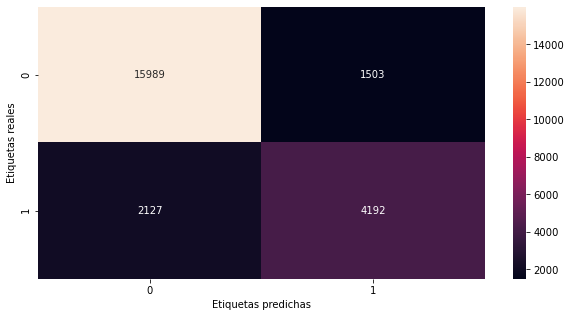

In [27]:
_print_matriz_confusion(y_test, y_pred_nb)

[[15927  1565]
 [ 2250  4069]]


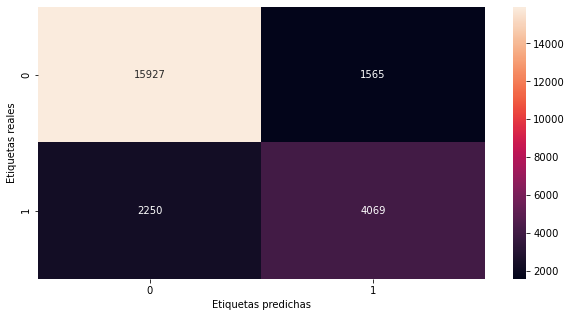

In [28]:
_print_matriz_confusion(y_test, y_pred_knn)

[[16734   758]
 [ 2264  4055]]


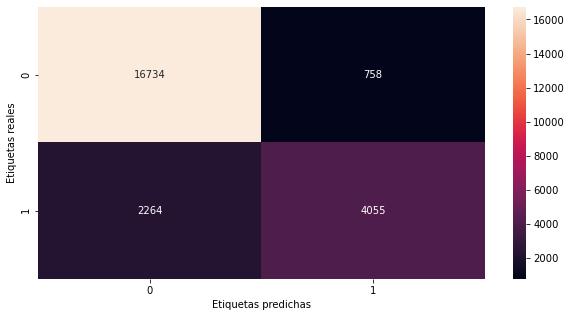

In [29]:
_print_matriz_confusion(y_test, y_pred_lr)

[[16603   889]
 [ 2280  4039]]


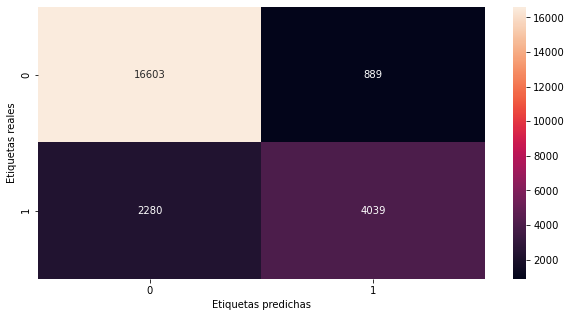

In [30]:
_print_matriz_confusion(y_test, y_pred_t)

#### Recall,Precision and F-1 Score Modelos con parámetros por defecto


* Recall    =  TP / (TP + FN)
* Precision = TP / (TP + FP) 
* F-Measure = (2 * Precision * Recall) / (Precision + Recall)

In [31]:
print("NB:\n", classification_report(y_test,y_pred_nb))
print("KNN:\n", classification_report(y_test,y_pred_knn))
print("LR:\n", classification_report(y_test,y_pred_lr))
print("T:\n", classification_report(y_test,y_pred_t))

NB:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90     17492
           1       0.74      0.66      0.70      6319

    accuracy                           0.85     23811
   macro avg       0.81      0.79      0.80     23811
weighted avg       0.84      0.85      0.84     23811

KNN:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89     17492
           1       0.72      0.64      0.68      6319

    accuracy                           0.84     23811
   macro avg       0.80      0.78      0.79     23811
weighted avg       0.84      0.84      0.84     23811

LR:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92     17492
           1       0.84      0.64      0.73      6319

    accuracy                           0.87     23811
   macro avg       0.86      0.80      0.82     23811
weighted avg       0.87      0.87      0.87     23811

T:


In [32]:
print ("F1 Score NB:", f1_score(y_test,y_pred_nb))
print ("F1 Score KNN:", f1_score(y_test,y_pred_knn))
print ("F1 Score LR:", f1_score(y_test,y_pred_lr))
print ("F1 Score T:", f1_score(y_test,y_pred_t))

F1 Score NB: 0.6978525054103546
F1 Score KNN: 0.6808332636158287
F1 Score LR: 0.7285303629177147
F1 Score T: 0.718235974037521


#### roc & auc Modelos con parámetros por defecto

In [33]:
#NB
probs_nb=nb.predict_proba(x_test)
preds_nb=probs_nb[:,1]
fpr_nb,tpr_nb, threshold_nb =metrics.roc_curve(y_test, y_pred_nb)
roc_auc_nb=metrics.auc(fpr_nb,tpr_nb)

#KNN
probs_knn=knn.predict_proba(x_test)
preds_knn=probs_knn[:,1]
fpr_knn,tpr_knn, threshold_knn =metrics.roc_curve(y_test, y_pred_knn)
roc_auc_knn=metrics.auc(fpr_knn,tpr_knn)

#LR
probs_lr=lr.predict_proba(x_teststd)
preds_lr=probs_lr[:,1]
fpr_lr,tpr_lr, threshold_lr =metrics.roc_curve(y_test, y_pred_lr)
roc_auc_lr=metrics.auc(fpr_lr,tpr_lr)

#T
probs_t=clftree.predict_proba(x_test)
preds_t=probs_t[:,1]
fpr_t,tpr_t, threshold_t =metrics.roc_curve(y_test, y_pred_t)
roc_auc_t=metrics.auc(fpr_t,tpr_t)

print ("ROC AUC NB:", roc_auc_nb)
print ("ROC AUC KNN:", roc_auc_knn)
print ("ROC AUC LR:", roc_auc_lr)
print ("ROC AUC T:", roc_auc_t)

ROC AUC NB: 0.7887355563479258
ROC AUC KNN: 0.7772307649911318
ROC AUC LR: 0.7991906828603076
ROC AUC T: 0.794180090809582


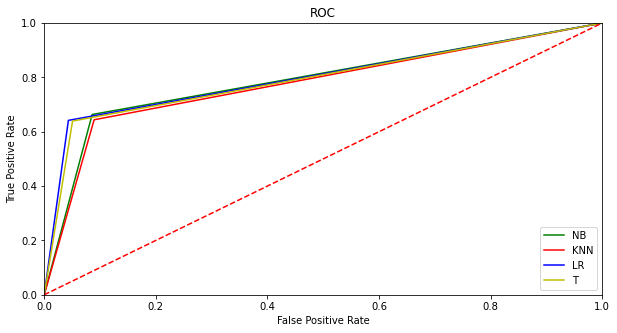

In [34]:
plt.title("ROC")

plt.plot(fpr_nb, tpr_nb, 'g', label="NB" % roc_auc_nb)
plt.plot(fpr_knn, tpr_knn, 'r', label="KNN" % roc_auc_nb)
plt.plot(fpr_lr, tpr_lr, 'b', label="LR" % roc_auc_nb)
plt.plot(fpr_t, tpr_t, 'y', label="T" % roc_auc_nb)

plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Gridsearch Tree classification y Graficos

#### Grafico previo a optimización Tree Classification

In [35]:
dot_data1= tree.export_graphviz(clftree, out_file=None,feature_names= x_train.columns, filled = True)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.142937 to fit



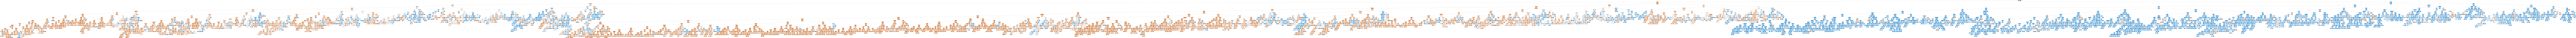

In [36]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

#### GridSearch para Tree Classification

In [37]:
params_grid = { "criterion" : ["gini", "entropy"],
                "min_samples_leaf": [5,10,15,20,None], 
                "max_depth" : [1,2,3,4,5,6,8,9,10,11,None],
                "min_samples_split": [2, 3, 4,None]}

In [38]:
clftree = tree.DecisionTreeClassifier(random_state=40)

In [39]:
grid_search = GridSearchCV(clftree, params_grid,
                           n_jobs=-1, scoring='accuracy')

In [40]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=40), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, None],
                         'min_samples_leaf': [5, 10, 15, 20, None],
                         'min_samples_split': [2, 3, 4, None]},
             scoring='accuracy')

In [41]:
grid_search.best_score_

0.8724539257377518

In [42]:
#cv_clf = grid_search.best_estimator_

In [43]:
#accuracy_score(y_test, cv_clf.predict(x_test))

0.8720759312922599

In [44]:
#confusion_matrix(y_test, cv_clf.predict(x_test))

array([[16645,   847],
       [ 2199,  4120]], dtype=int64)

### Modelos con parámetros optimizados

In [45]:
#Naive Bayes
nb=MultinomialNB()
nb.fit(x_train, y_train)
score_nb=nb.score(x_test,y_test)

#KNN (poner en n_neighbors el best_params_ de GridSearch)
knn=KNeighborsClassifier(n_neighbors=18)
knn.fit(x_train,y_train)
score_knn=knn.score(x_test,y_test)

#Logistic regression
scaler = StandardScaler()
x_trainstd = scaler.fit_transform(x_train)
x_teststd = scaler.transform(x_test)
lr = LogisticRegression()
lr.fit(x_trainstd, y_train)
score_lr= lr.score(x_teststd, y_test)

#Tree Classification
cv_clf = grid_search.best_estimator_
cv_clf.fit(x_train, y_train)
score_t = cv_clf.score(x_test, y_test)

#Score
print ("Naive Bayes Acc Score:",score_nb)
print ("KNN Acc Score:",score_knn)
print ("Logistic Regression Score:", score_lr)
print("Tree classification Score:", score_t)

Naive Bayes Acc Score: 0.8475494519339801
KNN Acc Score: 0.8697660745033808
Logistic Regression Score: 0.8730838688001344
Tree classification Score: 0.8720759312922599


In [46]:
y_pred_nb = nb.predict(x_test)
y_pred_knn = knn.predict(x_test)
y_pred_lr = lr.predict(x_teststd)
y_pred_t = cv_clf.predict(x_test)

In [47]:
print("AS NB:\n", accuracy_score(y_test, y_pred_nb))
print("AS KNN:\n", accuracy_score(y_test, y_pred_knn))
print("AS LR:\n", accuracy_score(y_test, y_pred_lr))
print("T LR:\n", accuracy_score(y_test, cv_clf.predict(x_test)))

AS NB:
 0.8475494519339801
AS KNN:
 0.8697660745033808
AS LR:
 0.8730838688001344
T LR:
 0.8720759312922599


#### Confusion_matrix Modelos Mejorados

In [48]:
print("CM NB:\n", confusion_matrix(y_test, y_pred_nb))
print("CM KNN:\n", confusion_matrix(y_test, y_pred_knn))
print("CM LR:\n", confusion_matrix(y_test, y_pred_lr))
print("T LR:\n", confusion_matrix(y_test, cv_clf.predict(x_test)))

CM NB:
 [[15989  1503]
 [ 2127  4192]]
CM KNN:
 [[16725   767]
 [ 2334  3985]]
CM LR:
 [[16734   758]
 [ 2264  4055]]
T LR:
 [[16645   847]
 [ 2199  4120]]


#### Recall,Precision and F-1 Score Modelos mejorados


* Recall    =  TP / (TP + FN)
* Precision = TP / (TP + FP) 
* F-Measure = (2 * Precision * Recall) / (Precision + Recall)

In [49]:
print("NB:\n", classification_report(y_test,y_pred_nb))
print("KNN:\n", classification_report(y_test,y_pred_knn))
print("LR:\n", classification_report(y_test,y_pred_lr))
print("T:\n", classification_report(y_test,cv_clf.predict(x_test)))

NB:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90     17492
           1       0.74      0.66      0.70      6319

    accuracy                           0.85     23811
   macro avg       0.81      0.79      0.80     23811
weighted avg       0.84      0.85      0.84     23811

KNN:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92     17492
           1       0.84      0.63      0.72      6319

    accuracy                           0.87     23811
   macro avg       0.86      0.79      0.82     23811
weighted avg       0.87      0.87      0.86     23811

LR:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92     17492
           1       0.84      0.64      0.73      6319

    accuracy                           0.87     23811
   macro avg       0.86      0.80      0.82     23811
weighted avg       0.87      0.87      0.87     23811

T:


In [50]:
print ("F1 Score NB:", f1_score(y_test,y_pred_nb))
print ("F1 Score KNN:", f1_score(y_test,y_pred_knn))
print ("F1 Score LR:", f1_score(y_test,y_pred_lr))
print ("F1 Score T:", f1_score(y_test,cv_clf.predict(x_test)))

F1 Score NB: 0.6978525054103546
F1 Score KNN: 0.7198988347936048
F1 Score LR: 0.7285303629177147
F1 Score T: 0.7301080985291512


#### roc & auc Modelos mejorados

In [51]:
#NB
probs_nb=nb.predict_proba(x_test)
preds_nb=probs_nb[:,1]
fpr_nb,tpr_nb, threshold_nb =metrics.roc_curve(y_test, y_pred_nb)
roc_auc_nb=metrics.auc(fpr_nb,tpr_nb)

#KNN
probs_knn=knn.predict_proba(x_test)
preds_knn=probs_knn[:,1]
fpr_knn,tpr_knn, threshold_knn =metrics.roc_curve(y_test, y_pred_knn)
roc_auc_knn=metrics.auc(fpr_knn,tpr_knn)

#LR
probs_lr=lr.predict_proba(x_teststd)
preds_lr=probs_lr[:,1]
fpr_lr,tpr_lr, threshold_lr =metrics.roc_curve(y_test, y_pred_lr)
roc_auc_lr=metrics.auc(fpr_lr,tpr_lr)

#T
probs_t=cv_clf.predict_proba(x_test)
preds_t=probs_t[:,1]
fpr_t,tpr_t, threshold_t =metrics.roc_curve(y_test, y_pred_t)
roc_auc_t=metrics.auc(fpr_t,tpr_t)

print ("ROC AUC NB:", roc_auc_nb)
print ("ROC AUC KNN:", roc_auc_knn)
print ("ROC AUC LR:", roc_auc_lr)
print ("ROC AUC T:", roc_auc_t)

ROC AUC NB: 0.7887355563479258
ROC AUC KNN: 0.7933945713143498
ROC AUC LR: 0.7991906828603076
ROC AUC T: 0.8017898816005666


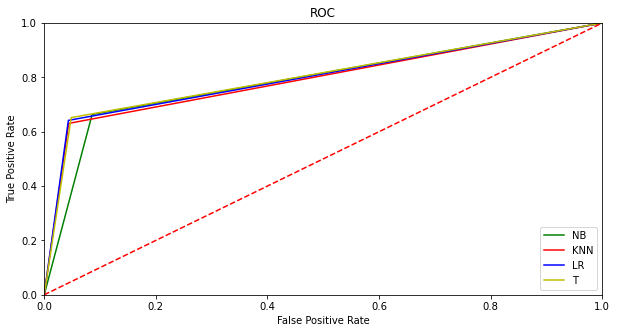

In [52]:
plt.title("ROC")

plt.plot(fpr_nb, tpr_nb, 'g', label="NB" % roc_auc_nb)
plt.plot(fpr_knn, tpr_knn, 'r', label="KNN" % roc_auc_nb)
plt.plot(fpr_lr, tpr_lr, 'b', label="LR" % roc_auc_nb)
plt.plot(fpr_t, tpr_t, 'y', label="T" % roc_auc_nb)

plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Gráfico post optimización Tree Classification

In [53]:
dot_data = tree.export_graphviz(cv_clf, out_file=None,feature_names= x_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.669384 to fit

